In [1]:
from google.colab import files
uploaded = files.upload()  # Upload the zipped dataset

Saving EuroSAT.zip to EuroSAT.zip


In [2]:
import zipfile
import os

# Unzip the uploaded file
zip_filename = list(uploaded.keys())[0]  # Get uploaded file name
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('./data')  # Extract to a "data" directory

# Set the directory for the dataset
train_dir = './data/2750'

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [4]:
# Image parameters
batch_size = 32
img_height = 64
img_width = 64
validation_split = 0.2

In [5]:
# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=validation_split
)

In [7]:
# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 21600 images belonging to 10 classes.


In [8]:
# Load validation data
validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 5400 images belonging to 10 classes.


In [9]:
# Get class names
class_names = list(train_data.class_indices.keys())
print("Class Names:", class_names)


Class Names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [10]:
# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


In [12]:
# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,241,802 (58.14 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    batch_size=batch_size
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - accuracy: 0.5658 - loss: 1.2094 - val_accuracy: 0.7761 - val_loss: 0.6729
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 54s 80ms/step - accuracy: 0.7434 - loss: 0.7393 - val_accuracy: 0.7996 - val_loss: 0.5892
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - accuracy: 0.7624 - loss: 0.6786 - val_accuracy: 0.8037 - val_loss: 0.5716
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 48s 71ms/step - accuracy: 0.7749 - loss: 0.6418 - val_accuracy: 0.8146 - val_loss: 0.5405
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 48s 71ms/step - accuracy: 0.7879 - loss: 0.6108 - val_accuracy: 0.8180 - val_loss: 0.5281
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 48s 71ms/step - accuracy: 0.7903 - loss: 0.6084 - val_accuracy: 0.8019 - val_loss: 0.5527
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 48s 71ms/step - accuracy: 0.7975 - loss: 0.5904 - val_accuracy: 0.8302 - val_loss: 0.4950
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - accuracy: 0.8053 - loss: 0.5608 - val_accurac

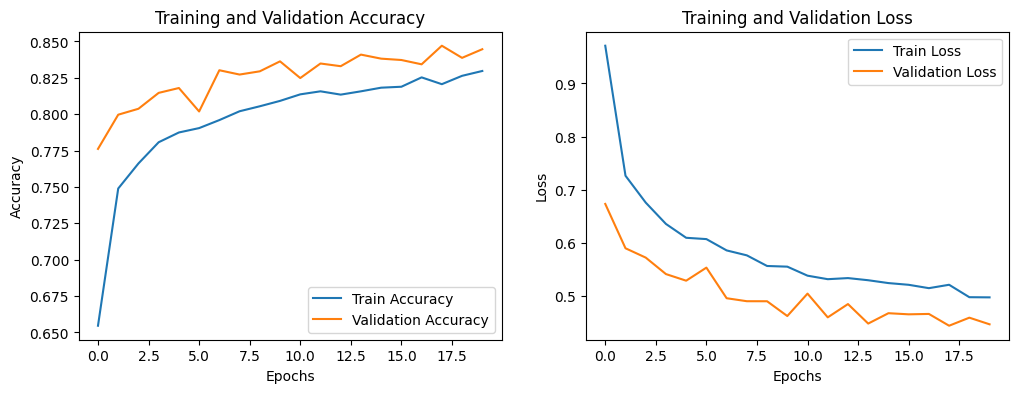

In [16]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [17]:
# Generate predictions
y_true = []
y_pred = []

for images, labels in validation_data:
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(model.predict(images), axis=1))
    if len(y_true) >= validation_data.samples:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

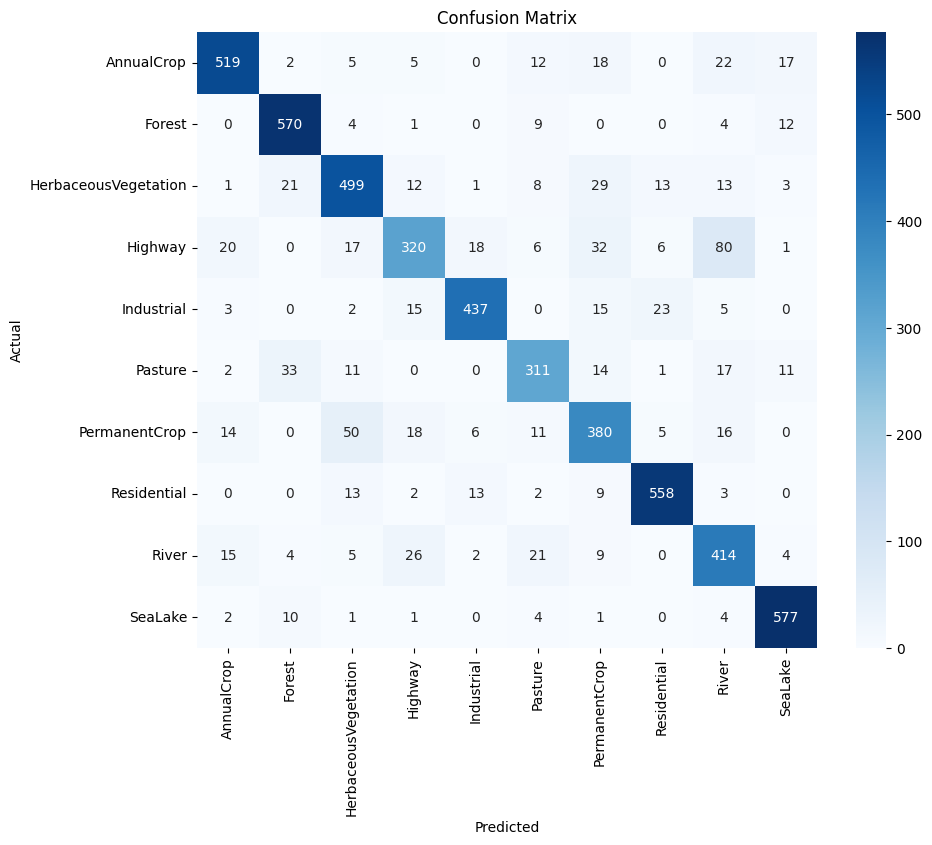

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.90      0.86      0.88       600
              Forest       0.89      0.95      0.92       600
HerbaceousVegetation       0.82      0.83      0.83       600
             Highway       0.80      0.64      0.71       500
          Industrial       0.92      0.87      0.89       500
             Pasture       0.81      0.78      0.79       400
       PermanentCrop       0.75      0.76      0.75       500
         Residential       0.92      0.93      0.93       600
               River       0.72      0.83      0.77       500
             SeaLake       0.92      0.96      0.94       600

            accuracy                           0.85      5400
           macro avg       0.84      0.84      0.84      5400
        weighted avg       0.85      0.85      0.85      5400



In [20]:
model.save('newvgg16.h5')

In [21]:
from google.colab import files  # Only needed if using Google Colab

# Download the model (for local Jupyter Notebook or Colab)
files.download('newvgg16.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>